<a href="https://colab.research.google.com/github/mahshidyaghoobzadeh/Recommendation_p/blob/main/acne_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyunpack
!pip install patool

In [18]:

from pyunpack import Archive
Archive('/content/drive/MyDrive/Project/acne.rar').extractall('/content/sample_data')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import cv2
import matplotlib.pylab as plt
from PIL import Image
import numpy as np
from PIL import Image, ImageDraw
import torchvision.transforms as transforms
import random
np.random.seed(0)
random.seed(0)

In [20]:
import os
clear = os.listdir('/content/sample_data/acne/clear')
mild = os.listdir('/content/sample_data/acne/mild')
moderate = os.listdir('/content/sample_data/acne/moderate')
severe = os.listdir('/content/sample_data/acne/severe')
very_severe = os.listdir('/content/sample_data/acne/very severe')
print('Number of healthy face :',len(clear))
print('Number of face with mild acne:',len(mild))
print('Number of face with moderate acne:',len(moderate))
print('Number of face with severe acne:',len(severe))
print('Number of face with very severe acne:',len(very_severe))


Number of healthy face : 114
Number of face with mild acne: 59
Number of face with moderate acne: 62
Number of face with severe acne: 50
Number of face with very severe acne: 51


In [ ]:
healthy_data=[]
for x in clear:
  path = os.path.join('/content/sample_data/acne/clear',x)
  healthy_path = cv2.imread(path)
  healthy_picture = cv2.resize(healthy_path, (224, 224))
  image_gray = cv2.cvtColor(healthy_picture, cv2.COLOR_BGR2GRAY)
  img = cv2.GaussianBlur(image_gray,(3,3),0)
  filtered_image = cv2.Laplacian(img, ksize=3, ddepth=cv2.CV_16S)
  healthy_picture = cv2.convertScaleAbs(filtered_image)
  healthy_data.append(healthy_picture)
healthy_data = np.array(healthy_data)
print(healthy_data.shape)

(114, 224, 224)


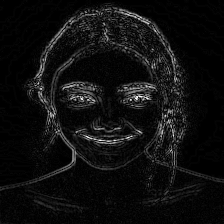

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(healthy_data[10])

In [ ]:
mild_data=[]
for x in mild:
  path = os.path.join('/content/sample_data/acne/mild',x)
  mild_path = cv2.imread(path)
  mild_picture = cv2.resize(mild_path, (224, 224))
  image_gray = cv2.cvtColor(mild_picture, cv2.COLOR_BGR2GRAY)
  mild_picture = cv2.Canny(image_gray, threshold1=20, threshold2=200)
  #mild_picture = cv2.Canny(mild_picture,100,200)
  mild_data.append(mild_picture)
mild_data = np.array(mild_data)
print(mild_data.shape)

(59, 224, 224)


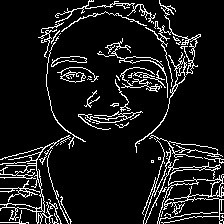

In [ ]:
cv2_imshow(mild_data[30])

In [ ]:
moderate_data=[]
for x in moderate:
  path = os.path.join('/content/sample_data/acne/moderate',x)
  moderate_path = cv2.imread(path)
  moderate_picture = cv2.resize(moderate_path, (224, 224))
  image_gray = cv2.cvtColor(moderate_picture, cv2.COLOR_BGR2GRAY)
  moderate_picture = cv2.Canny(image_gray, threshold1=20, threshold2=200)
  #moderate_picture = cv2.Canny(moderate_picture,100,200)
  moderate_data.append(moderate_picture)
moderate_data = np.array(moderate_data)
print(moderate_data.shape)

(62, 224, 224)


In [ ]:
cv2_imshow(moderate_data[30])

In [ ]:
severe_data=[]
for x in severe:
  path = os.path.join('/content/sample_data/acne/severe',x)
  severe_path = cv2.imread(path)
  severe_picture = cv2.resize(severe_path, (224, 224))
  image_gray = cv2.cvtColor(severe_picture, cv2.COLOR_BGR2GRAY)
  severe_picture = cv2.Canny(image_gray, threshold1=20, threshold2=200)
  #severe_picture = cv2.Canny(severe_picture,100,200)
  severe_data.append(severe_picture)
severe_data = np.array(severe_data)
print(severe_data.shape)

(50, 224, 224)


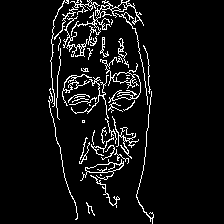

In [ ]:
cv2_imshow(severe_data[30])

In [ ]:
very_severe_data=[]
for x in very_severe:
  path = os.path.join('/content/sample_data/acne/very severe',x)
  very_severe_path = cv2.imread(path)
  very_severe_picture = cv2.resize(very_severe_path, (224, 224))
  image_gray = cv2.cvtColor(very_severe_picture, cv2.COLOR_BGR2GRAY)
  very_severe_picture = cv2.Canny(image_gray, threshold1=20, threshold2=200)
  #very_severe_picture = cv2.Canny(very_severe_picture,100,200)
  very_severe_data.append(very_severe_picture)
very_severe_data = np.array(very_severe_data)
print(very_severe_data.shape)

(51, 224, 224)


In [ ]:
cv2_imshow(very_severe_data[1])

In [ ]:
data = np.array([[healthy_data[0:50]],[healthy_data[50:100]],[mild_data[0:50]],[severe_data[0:50]],[very_severe_data[0:50]]])
data.astype("float32")
data.shape

(5, 1, 50, 224, 224)

In [ ]:
target  = np.array([[0 for i in range(50)],
                    [0 for i in range(50)],
                   [1 for i in range(50)],
                   [2 for i in range(50)],
                  [3 for i in range(50)]])

In [ ]:
input_data =data.reshape(data.shape[0]*data.shape[2],1,data.shape[3],data.shape[4])
input_data1 =data.reshape(data.shape[0]*data.shape[2],data.shape[3],data.shape[4],1)
target1 = target.reshape(target.shape[0]*target.shape[1],1)
print(input_data1.shape,target1.shape)

(250, 224, 224, 1) (250, 1)


In [ ]:
meanRGB=[np.mean(x,axis=(1)) for x in input_data]
stdRGB=[np.std(x,axis=(1)) for x in input_data]

In [ ]:
meanR=np.mean([m[0] for m in meanRGB])
#meanG=np.mean([m[1] for m in meanRGB])
#meanB=np.mean([m[2] for m in meanRGB])
stdR=np.mean([s[0] for s in stdRGB])
#stdG=np.mean([s[1] for s in stdRGB])
#stdB=np.mean([s[2] for s in stdRGB])
#print(meanR,meanG,meanB)
#print(stdR,stdG,stdB)

In [ ]:
from keras.utils import np_utils
y = np_utils.to_categorical(target1)


In [ ]:
import torch
torch_data = torch.from_numpy(input_data)

In [ ]:
train_transformer = transforms.Compose([
transforms.RandomHorizontalFlip(p=0.5),
transforms.RandomVerticalFlip(p=0.5),
transforms.ToTensor(),
transforms.Normalize([meanR], [stdR])])

In [ ]:
from torch.utils.data import Subset
train_ds=Subset(torch_data,[i for i in range(round(torch_data.shape[0]))])


In [ ]:
train_ds.transform=train_transformer


In [ ]:
trainn = []
for x in train_ds:
  trainn.append(x.numpy())

In [ ]:
trainn = np.array(trainn)
print(trainn.shape)

(250, 1, 224, 224)


In [ ]:
trainn = trainn.reshape(trainn.shape[0],224,224,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainn, target1, test_size = 0.3, random_state=8)
print(y_train.shape,y_test.shape)
print(X_train.shape, X_test.shape)

(175, 1) (75, 1)
(175, 224, 224, 1) (75, 224, 224, 1)


In [ ]:
def min_pool2d(x):

    max_val = K.max(x) + 1 # we gonna replace all zeros with that value
    # replace all 0s with very high numbers
    is_zero = max_val * K.cast(K.equal(x,0), dtype=K.floatx())
    x = is_zero + x

    # execute pooling with 0s being replaced by a high number
    min_x = -K.pool2d(-x, pool_size=(2, 2),padding='valid',strides=(2,2))

    # depending on the value we either substract the zero replacement or not
    is_result_zero = max_val * K.cast(K.equal(min_x, max_val), dtype=K.floatx())
    min_x = min_x - is_result_zero

    return min_x # concatenate on channel

In [ ]:
input_data1 = np.array(input_data1)
input_data1 =input_data1.astype('float32')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam,SGD
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
tf.keras.backend.set_floatx('float32')
trainn = trainn.astype('float32')
y=Conv2D(1, (5),data_format='channels_last',activation='relu',padding='valid')(input_data1)
y=Conv2D(8, (3),data_format='channels_last',activation='relu',padding='valid')(y)
y=Conv2D(16, (3),data_format='channels_last',activation='relu',padding='valid')(y)
y=MaxPooling2D((2,2),padding='valid',strides=(2,2))(y)
y=Conv2D(32, (3),data_format='channels_last',activation='relu',padding='valid')(y)
y=Conv2D(32, (3),data_format='channels_last',activation='relu',padding='valid')(y)
y=MaxPooling2D((2,2),padding='valid',strides=(2,2))(y)
y1 = min_pool2d(y)
#y3 = keras.layers.Concatenate(axis=-1)([y1, y2])
data=Flatten()(y)
data.shape

TensorShape([250, 86528])

In [ ]:
from sklearn.model_selection import train_test_split
X_trainsm, X_testsm, y_trainsm, y_testsm = train_test_split(np.array(data),target1, test_size=0.3, random_state=21)
print(X_trainsm.shape, X_testsm.shape, y_trainsm.shape, y_testsm.shape)

(175, 86528) (75, 86528) (175, 1) (75, 1)


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import time
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import time
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score

RandomForest=RandomForestClassifier(max_depth=80,max_features=3,min_samples_leaf=3,min_samples_split=12,n_estimators=40)
RandomForest.fit(X_trainsm, y_trainsm)
y_pred_trainsm_rnd = RandomForest.predict(X_trainsm)
y_predsm_rnd = RandomForest.predict(X_testsm)
accuracy_trainsm = accuracy_score(y_trainsm, y_pred_trainsm_rnd)
accuracysm = accuracy_score(y_testsm, y_predsm_rnd)
print("Accuracysm of random_forest: %.2f%%" % (accuracysm * 100.0))
print("Accuracy trainsm of random_forest: %.2f%%" % (accuracy_trainsm * 100.0))


Accuracysm of random_forest: 50.67%
Accuracy trainsm of random_forest: 99.43%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 400, num = 20)]
#Number of features to consider at every split
max_features = [int(x) for x in np.linspace(start = 1, stop = 400, num = 20)]
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 400, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(0, 100, num = 20)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12,14,16,18,20]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [1, 22, 43, 64, 85, 106, 127, 148, 169, 190, 211, 232, 253, 274, 295, 316, 337, 358, 379, 400], 'max_features': [1, 22, 43, 64, 85, 106, 127, 148, 169, 190, 211, 232, 253, 274, 295, 316, 337, 358, 379, 400], 'max_depth': [0, 21, 42, 63, 84, 105, 126, 147, 168, 189, 210, 231, 252, 273, 294, 315, 336, 357, 378, 400, None], 'min_samples_split': [0, 5, 10, 15, 21, 26, 31, 36, 42, 47, 52, 57, 63, 68, 73, 78, 84, 89, 94, 100], 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'bootstrap': [True, False]}


In [ ]:
rf_random = RandomizedSearchCV(estimator = RandomForest, param_distributions = random_grid, n_iter = 200, cv = 5, verbose=3, random_state=21, n_jobs = -1,scoring='accuracy')
# Fit the random search model
rf_random.fit(np.array(data), target1.ravel())

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 13.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=80,
                                                    max_features=3,
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=3,
                                                    min_samples_split=12,
                                                    min_weight_fraction_leaf=0.0,
                     

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 231,
 'max_features': 190,
 'min_samples_leaf': 8,
 'min_samples_split': 52,
 'n_estimators': 106}

In [ ]:
RandomForest=RandomForestClassifier(bootstrap= True,max_depth= 231,max_features=190,min_samples_leaf= 8,min_samples_split= 52,n_estimators=106)
RandomForest.fit(X_trainsm, y_trainsm)
y_pred_trainsm_rnd = RandomForest.predict(X_trainsm)
y_predsm_rnd = RandomForest.predict(X_testsm)
accuracy_trainsm = accuracy_score(y_trainsm, y_pred_trainsm_rnd)
accuracysm = accuracy_score(y_testsm, y_predsm_rnd)
print("Accuracysm of random_forest: %.2f%%" % (accuracysm * 100.0))
print("Accuracy trainsm of random_forest: %.2f%%" % (accuracy_trainsm * 100.0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracysm of random_forest: 48.00%
Accuracy trainsm of random_forest: 93.14%


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()

In [ ]:
grid = GridSearchCV(

estimator=svm,
param_grid=[
  {'C': [1,5,8,10,20], 'kernel': ['linear']},
  {'C': [0.01,0.1,0.5,0.6,0.7,0.8,0.9,1,5,10], 'gamma': [0.001, 0.0001,0.1,0.01], 'kernel': ['rbf','sigmoid']},
 ],
        cv=5, scoring='accuracy', verbose=3, n_jobs=-1)

In [ ]:
grid.fit(np.array(data), target.ravel())

Fitting 5 folds for each of 85 candidates, totalling 425 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 425 out of 425 | elapsed: 36.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 5, 8, 10, 20], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 5, 10],
                          'gamma': [0.001, 0.0001, 0.1, 0.01],
                          'kernel': ['rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [ ]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
svm_model=SVC(C= 1, kernel= 'linear')
svm_model.fit(X_trainsm, y_trainsm)
y_pred_trainsm_rnd =svm_model.predict(X_trainsm)
y_predsm_rnd = svm_model.predict(X_testsm)
accuracy_trainsm = accuracy_score(y_trainsm, y_pred_trainsm_rnd)
accuracysm = accuracy_score(y_testsm, y_predsm_rnd)
print("Accuracysm of random_forest: %.2f%%" % (accuracysm * 100.0))
print("Accuracy trainsm of random_forest: %.2f%%" % (accuracy_trainsm * 100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracysm of random_forest: 56.00%
Accuracy trainsm of random_forest: 100.00%


In [ ]:
number_of_classes = 4
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)
print(Y_train.shape,Y_test.shape)

(175, 4) (75, 4)


In [ ]:
target_all = np_utils.to_categorical(target1, number_of_classes)
print(target_all.shape)

(250, 4)


In [ ]:
gen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)
test_gen = ImageDataGenerator()
train_generator = gen.flow(X_train, Y_train, batch_size=32)
test_generator = test_gen.flow(X_test, Y_test, batch_size=32)

from keras.applications. vgg16 import VGG16
from keras.applications.resnet50 import ResNet50

In [ ]:
!pip install keras-resnet

  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20487 sha256=62c3e90162c2650c1da7c15369ee892d4c453e3ac0b19c1146b366c78b74518c
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-resnet


In [ ]:
import keras
import keras_resnet.models
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import AveragePooling2D
from keras.layers import BatchNormalization
from keras import Model

In [ ]:
leaky_relu = keras.layers.LeakyReLU(alpha=0.2)
input = Input(shape=(224, 224, 1))
l1 = Conv2D(4, (5), padding='same', activation='relu', kernel_initializer="he_normal")(input)
l2 = Conv2D(4, (3), padding='same', activation='relu', kernel_initializer="he_normal")(l1)
l3 = MaxPooling2D(2, padding='same', strides=2)(l2)
l4 = Conv2D(8, (3), padding='valid', activation=leaky_relu, kernel_initializer="he_normal")(l3)
l4 = BatchNormalization(momentum=0.99)(l4)
l5 = Conv2D(8, (3), padding='valid', activation=leaky_relu, kernel_initializer="he_normal")(l4)
l6 = MaxPooling2D(2, padding='same', strides=2)(l5)
l6 = Conv2D(16, (3), padding='valid', activation=leaky_relu, kernel_initializer="he_normal")(l6)
l6 = BatchNormalization(momentum=0.99)(l6)
l7 = Conv2D(16, (3), padding='same', activation=leaky_relu, kernel_initializer="he_normal")(l6)
l8 = AveragePooling2D(2, padding='same', strides=2)(l7)
l8 = Conv2D(32, (3), padding='valid', activation=leaky_relu, kernel_initializer="he_normal")(l8)
l8 = BatchNormalization(momentum=0.99)(l8)
l9 = Conv2D(32, (3), padding='same', activation=leaky_relu, kernel_initializer="he_normal")(l8)
l9 = AveragePooling2D(2, padding='same', strides=2)(l9)
l9 = Conv2D(64, (3), padding='same', activation=leaky_relu, kernel_initializer="he_normal")(l9)
l9 = BatchNormalization(momentum=0.99)(l9)
l10 = Conv2D(64, (3), padding='valid', activation=leaky_relu, kernel_initializer="he_normal")(l9)
l10 = MaxPooling2D(2, padding='same', strides=2)(l10)
print(l10.shape)
l10 = Flatten()(l10)
x = Dense(1600, activation=leaky_relu)(l10)
x = BatchNormalization(momentum=0.9)(x)
x = Dropout(0.35)(x)
x = Dense(512, activation=leaky_relu)(x)
x = BatchNormalization(momentum=0.9)(x)
x = Dropout(0.35)(x)
x = Dense(256, activation=leaky_relu)(x)
x = BatchNormalization(momentum=0.9)(x)
x = Dropout(0.45)(x)
out = Dense(4, activation='softmax')(x)
custom_model = Model(inputs=input,outputs= out)


(None, 5, 5, 64)


In [ ]:
custom_model.compile(optimizer=tf.keras.optimizers.Nadam(
    learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07 ), loss ="categorical_crossentropy", metrics=["accuracy"])
hist = custom_model.fit(input_data1,target_all, batch_size=32,validation_batch_size=32,epochs=50, verbose=1)

Epoch 1/50
8/8 [==============================] - 18s 2s/step - loss: 1.2671 - accuracy: 0.7155
Epoch 2/50
8/8 [==============================] - 13s 2s/step - loss: 0.4259 - accuracy: 0.8112
Epoch 3/50
8/8 [==============================] - 13s 2s/step - loss: 0.3556 - accuracy: 0.8633
Epoch 4/50
8/8 [==============================] - 13s 2s/step - loss: 0.4808 - accuracy: 0.7920
Epoch 5/50
8/8 [==============================] - 13s 2s/step - loss: 0.1214 - accuracy: 0.9795
Epoch 6/50
8/8 [==============================] - 13s 2s/step - loss: 0.3259 - accuracy: 0.9064
Epoch 7/50
8/8 [==============================] - 13s 2s/step - loss: 0.0685 - accuracy: 0.9854
Epoch 8/50
8/8 [==============================] - 13s 2s/step - loss: 0.2075 - accuracy: 0.9374
Epoch 9/50
8/8 [==============================] - 13s 2s/step - loss: 0.0850 - accuracy: 0.9618
Epoch 10/50
8/8 [==============================] - 13s 2s/step - loss: 0.0188 - accuracy: 1.0000
Epoch 11/50
8/8 [======================

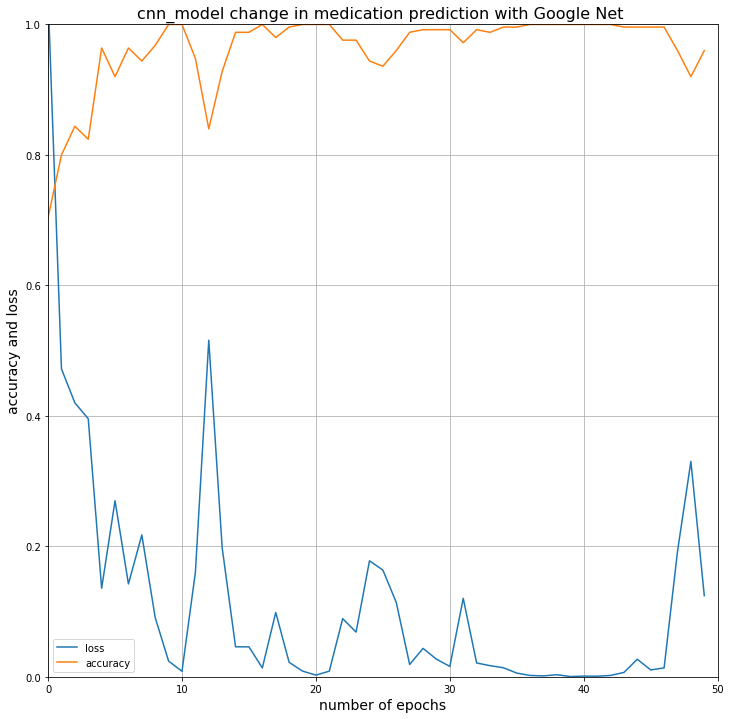

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(hist.history).plot(figsize=(12, 12))
plt.grid(True)
plt.gca().set_xlim(0, 50)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel('number of epochs', fontsize=14)
plt.ylabel('accuracy and loss', fontsize=14)
plt.title('cnn_model change in medication prediction with resenet ',fontsize=16)
plt.show()

In [ ]:

shape, classes = (224, 224, 1), 4
input = Input(shape=(224, 224, 1))
model = keras_resnet.models.ResNet50(input, classes=classes)
last_layer = model.get_layer('pool5').output
last_layer1 = Dropout(0.45)(last_layer)
x= Flatten(name='flatten')(last_layer1)
out = Dense(1000, activation='elu')(x)
x = Dropout(0.45)(x)
out = Dense(4, activation='softmax', name='output_layer')(x)
custom_resnet_model = Model(inputs=input,outputs= out)

custom_resnet_model.compile("adam", "categorical_crossentropy", ["accuracy"])
hist = custom_resnet_model.fit(X_train, Y_train, batch_size=64,validation_batch_size=64,epochs=100, verbose=1, validation_split=0.25)

Epoch 1/100
3/3 [==============================] - 100s 24s/step - loss: 2.7160 - accuracy: 0.3431 - val_loss: 1019868.0000 - val_accuracy: 0.2045
Epoch 2/100
3/3 [==============================] - 80s 22s/step - loss: 2.5449 - accuracy: 0.6044 - val_loss: 1467942.1250 - val_accuracy: 0.1818
Epoch 3/100
3/3 [==============================] - 80s 22s/step - loss: 2.1385 - accuracy: 0.6082 - val_loss: 2862543.7500 - val_accuracy: 0.1818
Epoch 4/100
3/3 [==============================] - 80s 22s/step - loss: 1.4557 - accuracy: 0.6121 - val_loss: 3882357.5000 - val_accuracy: 0.1818
Epoch 5/100
3/3 [==============================] - 81s 22s/step - loss: 1.4848 - accuracy: 0.5887 - val_loss: 10770204.0000 - val_accuracy: 0.2045
Epoch 6/100
3/3 [==============================] - 81s 22s/step - loss: 1.5534 - accuracy: 0.5925 - val_loss: 24982142.0000 - val_accuracy: 0.1818
Epoch 7/100
3/3 [==============================] - 81s 22s/step - loss: 0.9779 - accuracy: 0.7104 - val_loss: 37183760.00

KeyboardInterrupt: ignored